# hplc_chromatogram

In [ ]:

library(here)


here() starts at /home/runner/work/thiaminase-man/thiaminase-man

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Read in chromatogram data:

In [ ]:

hplc <- read_csv(
  file = here("data", "raw", "chromatogram", "hplc_thiamine_chromatogram.csv"),
  col_types = "ddff"
) |> 
  mutate(
    species = if_else(str_starts(group, "NIST"), "NIST", "RASM"),
    species = factor(species)
    )
  

nist <- hplc |> 
  filter(str_starts(group, "NIST"))

rasm <- hplc |> 
  filter(str_starts(group, "RASM"))


NIST plot:

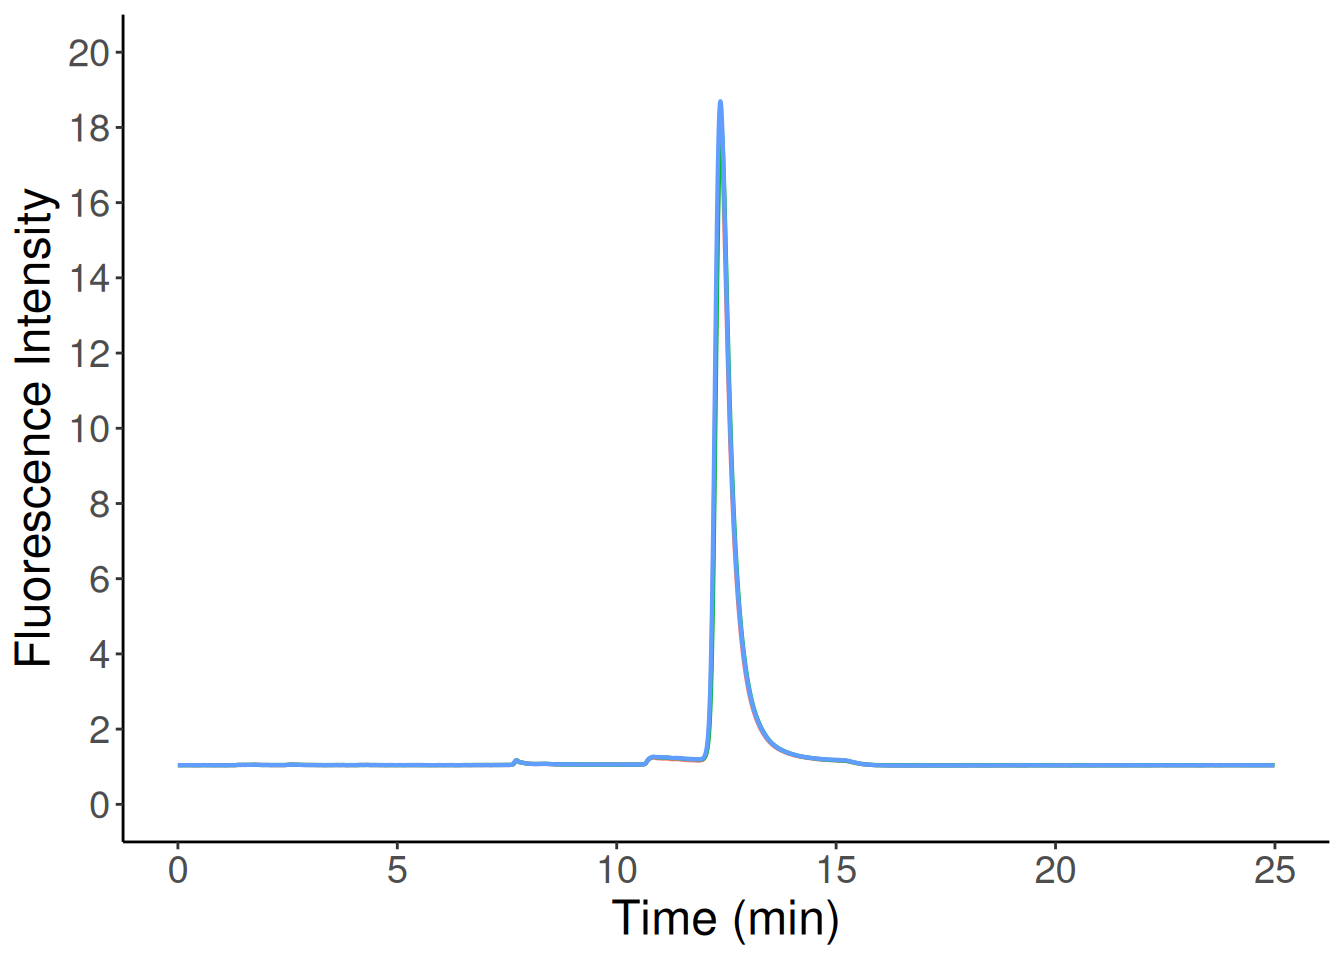

In [ ]:

nist_fig <- ggplot(data = nist, aes(x = x, y = y, group = time, color = time)) +
  geom_line(linewidth = 0.75) +
  labs(x = "Time (min)",
       y = "Fluorescence Intensity") +
  scale_y_continuous(breaks = seq(0, 20, 2), limits = c(0, 20)) +
  guides(color = "none") +
  my_theme

nist_fig


RASM plot:

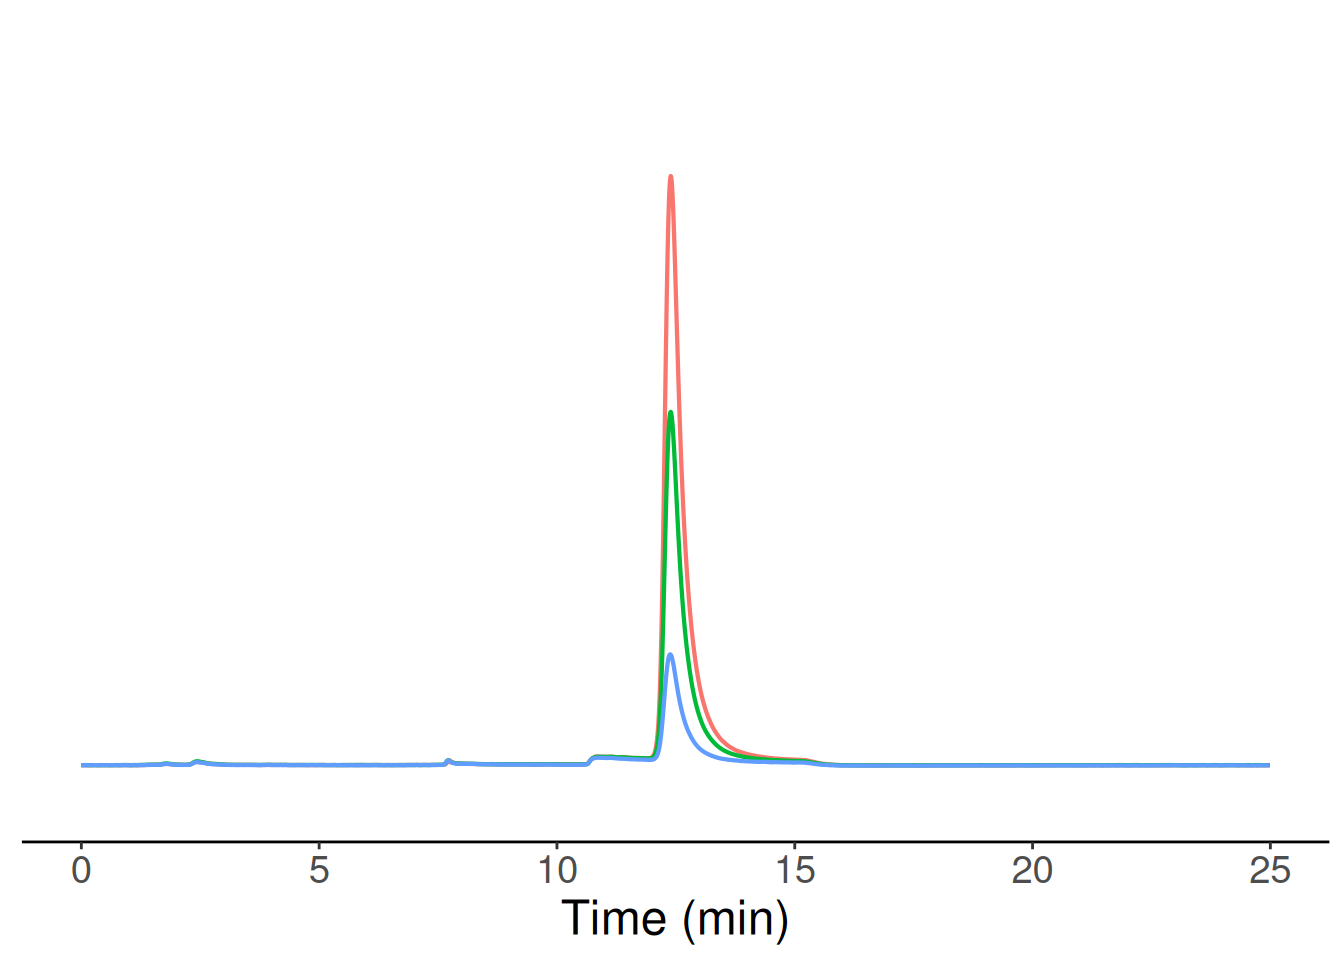

In [ ]:

rasm_fig <- ggplot(data = rasm, aes(x = x, y = y, group = time, color = time)) +
  geom_line(linewidth = 0.75) +
  labs(x = "Time (min)",
       y = "Fluorescence Intensity") +
  scale_y_continuous(breaks = seq(0, 20, 2), limits = c(0, 20)) +
  my_theme +
  guides(color = "none") +
  theme(axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.line.y = element_blank())

rasm_fig


Make them into a 2 panel plot:

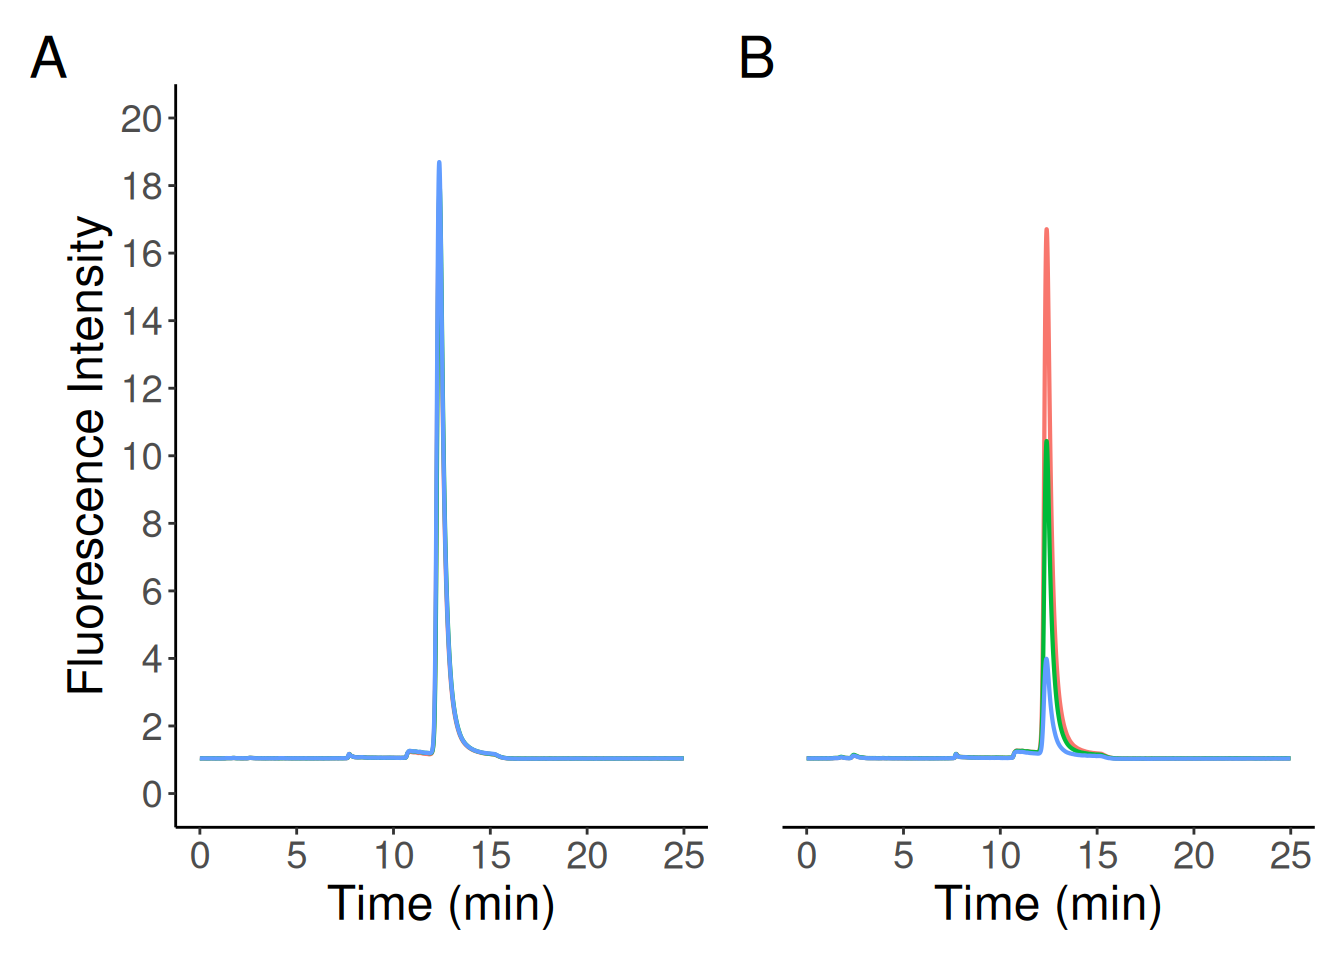

In [ ]:

chromatogram_panel <- nist_fig + rasm_fig + plot_annotation(tag_levels = "A")

chromatogram_panel


Save chromatogram panel:

In [ ]:

ggsave(
  filename = "chromatogram_panel_plot.png",
  plot = chromatogram_panel,
  path = here("output", "figs"),
  width = fig_width * 2,
  height = fig_height,
  units = "in",
  dpi = dpi
)
